Homework 4 Spring 2023

Due Date - 04/19/2023, 11:59PM



Name: Shruti Agarwal<br>
UNI: sa4136<br>

### PART-1: Neural Network from the scratch

For this part, you are not allowed to use any library other than numpy.

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) with the network image uploaded

The weight matrix for the hidden layer is W1 and has bias b1.

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is sigmoid for both hidden and output layer

Loss function is the MSE loss

Refer to the below dictionary for dimensions for each matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import train_test_split
import keras
import pandas as pd

In [3]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [4]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [6]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = np.sum(dLdZ2, axis = 0)
    dldH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(1,-1))
    dldZ1 = np.multiply(dldH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(dldZ1.T, X)
    dLdb1 = np.sum(dldZ1, axis = 0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [7]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [8]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066])

# PART 2 MNIST Dataset

Description: The MNIST dataset is a widely-used benchmark dataset in the field of machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits (0-9), with 60,000 images in the training set and 10,000 images in the test set. The images are 28x28 pixels in size, and each pixel is represented by an integer value between 0 and 255, with 0 representing a white pixel and 255 representing a black pixel.

In [9]:
from tensorflow.keras.datasets import mnist

# The MNIST dataset and the labels have been provided for you
(x_dev, y_dev), (x_test, y_test) = mnist.load_data()


In [10]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

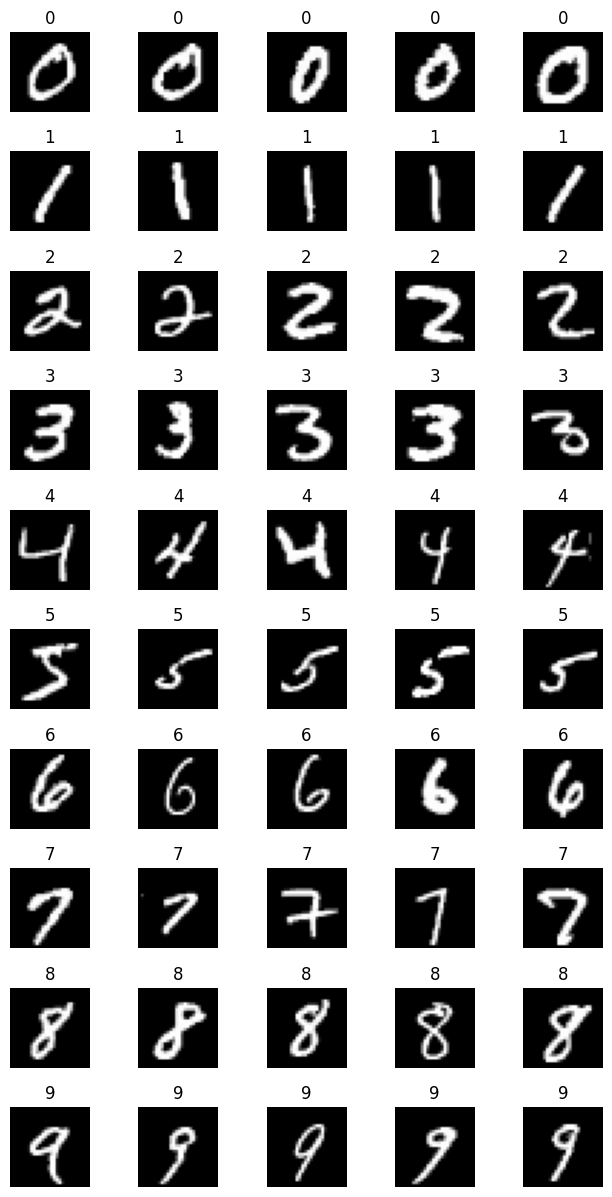

In [11]:
fig, ax = plt.subplots(10,5, figsize = (8,15))

for class_id in range(len(LABELS)):
  class_i = (y_dev == class_id).nonzero()[0]
  sample_i = class_i[:5]

  for i, sample_id in enumerate(sample_i):
    img = x_dev[sample_id]
    lbl = y_dev[sample_id]

    ax[class_id][i].imshow(img, cmap = 'gray')
    ax[class_id][i].axis('off')
    ax[class_id][i].set_title(str(lbl))

fig.subplots_adjust(hspace = 0.5)
plt.show()

2.2  Preparing the dataset


1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [12]:
print("X_dev shape:", x_dev.shape, "X_test shape:", x_test.shape)
print("Y_dev shape:", y_dev.shape, "Y_test shape:", y_test.shape)

X_dev shape: (60000, 28, 28) X_test shape: (10000, 28, 28)
Y_dev shape: (60000,) Y_test shape: (10000,)


In [13]:
x_test1 = x_test
y_test1 = y_test

x_dev = x_dev.reshape(60000, 784)
x_dev = x_dev.astype('float32')

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')

print("X_dev shape after reshaping:", x_dev.shape)
print("X_test shape after reshaping:", x_test.shape)

X_dev shape after reshaping: (60000, 784)
X_test shape after reshaping: (10000, 784)


In [14]:
x_dev = x_dev / 255.0
y_dev = keras.utils.to_categorical(y_dev, num_classes=10)

x_test = x_test / 255.0
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_dev,y_dev, test_size = 0.2)

2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [16]:
model = keras.Sequential([keras.layers.Dense(128,input_shape = (784,), activation='relu'), 
                          keras.layers.Dense(64, activation='relu'),  
                          keras.layers.Dense(10, activation='softmax') 
])


2.3.1) Comment briefly on importance of activation functions used.

ReLU (Rectified Linear Unit) is an important activation function in deep learning because it helps to mitigate the vanishing gradient problem and allows for faster and more stable training of deep networks. Its efficiency and effectiveness have contributed to its widespread adoption in various applications.

Softmax is an important activation function used in neural networks for multi-class classification tasks, as it converts the output of a network into a probability distribution. It helps to ensure that the output of the model sums up to 1, making it easier to interpret and compare the predicted probabilities for different classes.

2.4) Print out the model summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2.5) Do you think this number is dependent on the image height and width? 

Yes, this number is dependent on the image height and width. 
Each image had 784 input values because we flatten it out to a 1-D vector. By specifying output = 128 nodes and adding the bias term, we get 100480 parameters. For the hidden layer we have 8256 (input = 128, output = 64, adding bias). The output layer has 650 parameters (input = 64 nodes, output = 10 nodes, adding bias) 

2.6) Use the right metric and  the right loss function and batch size, with Adam as the optimizer, train your model for 10 epochs .

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history_callback = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.3666 - accuracy: 0.8961 - val_loss: 0.2034 - val_accuracy: 0.9409
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1510 - accuracy: 0.9563 - val_loss: 0.1423 - val_accuracy: 0.9584
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1065 - accuracy: 0.9687 - val_loss: 0.1135 - val_accuracy: 0.9660
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.1019 - val_accuracy: 0.9686
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.1024 - val_accuracy: 0.9702
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0939 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

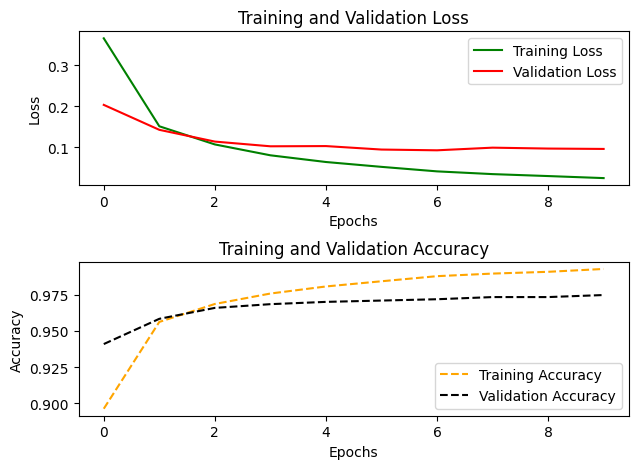

In [20]:
hist = pd.DataFrame(history_callback.history)
fig,ax = plt.subplots(2,1)
ax[0].plot(hist.index, hist['loss'], color = 'green', label = 'Training Loss')
ax[0].plot(hist.index, hist['val_loss'], color = 'red', label='Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title("Training and Validation Loss")

ax[1].plot(hist.index, hist['accuracy'],color = 'orange', linestyle='--' , label='Training Accuracy')
ax[1].plot(hist.index, hist['val_accuracy'],color = 'black', linestyle='--', label='Validation Accuracy' )
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title("Training and Validation Accuracy")

fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

2.8) Finally, report the metric chosen on test set

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9754
Test accuracy: 0.9753999710083008


2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P).

313/313 [==============================] - 0s 1ms/step


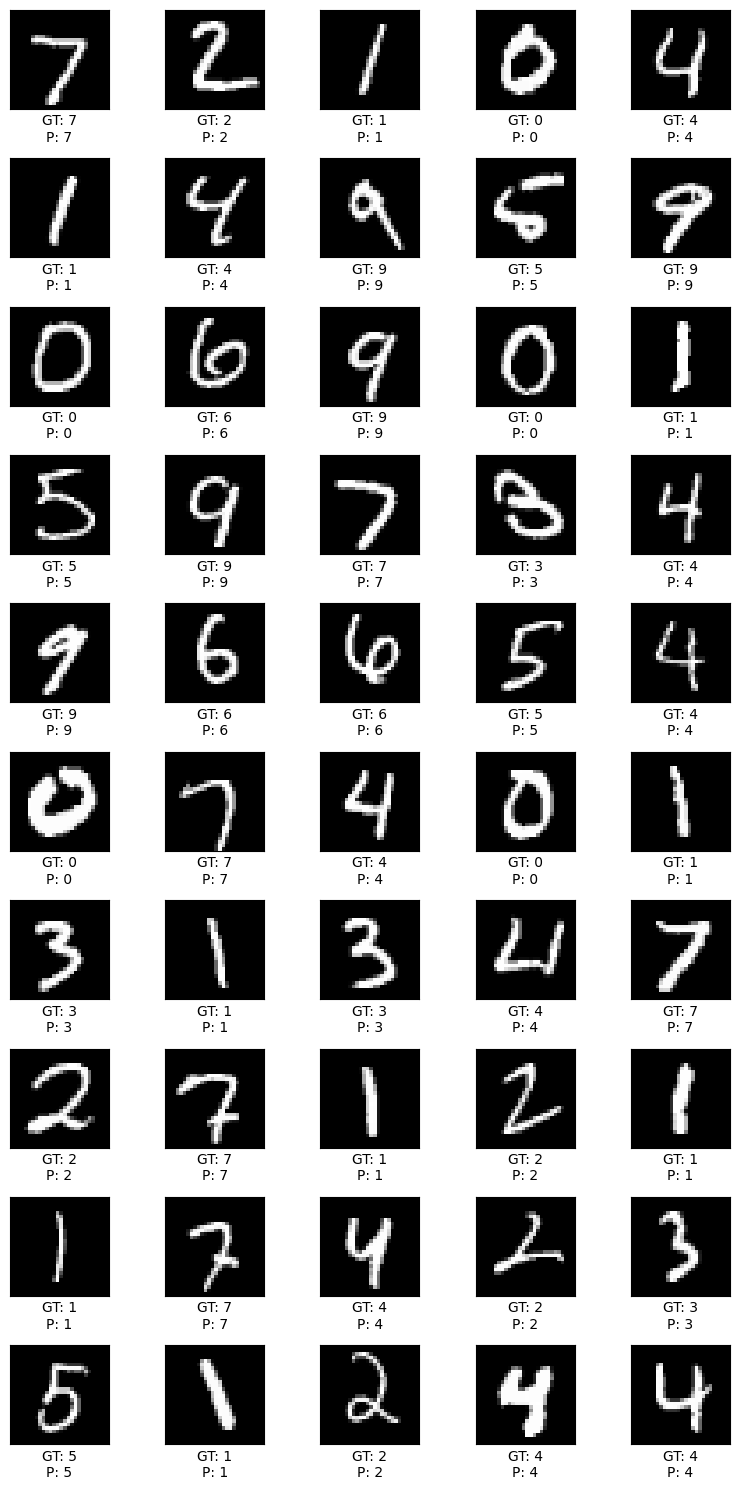

In [22]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=-1)

fig, ax = plt.subplots(5, 10, figsize=(8, 15))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.imshow(x_test1[i], cmap='gray')
    plt.xlabel("GT: " + LABELS[y_test1[i]] + "\n" + "P: " + LABELS[y_pred[i]])
    plt.xticks([])
    plt.yticks([])
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()